### This project is about analyzing student performance data, where we will use `KNN Regression` to predict students’ GPA based on their demographics, study habits, and extracurricular activities.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### The dataset we are having is `Student_performance_data.csv` using pandas import it

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sherians/datasets/Student_performance_data.csv')

### View the top 5 rows of the dataset

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Let’s explore the dataset to see the data types of each column. we  will use `.info()` for this

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### Check for total null values present in the dataset

In [6]:
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


### The ‘StudentID’ column does not contribute to our analysis, so we can drop it.

In [8]:
df=df.drop("StudentID", axis = 1)

### Visualization

### Plotting the GPA distribution to visualize how students’ academic performance is spread across the dataset `histplot()`.

<Axes: xlabel='GPA', ylabel='Count'>

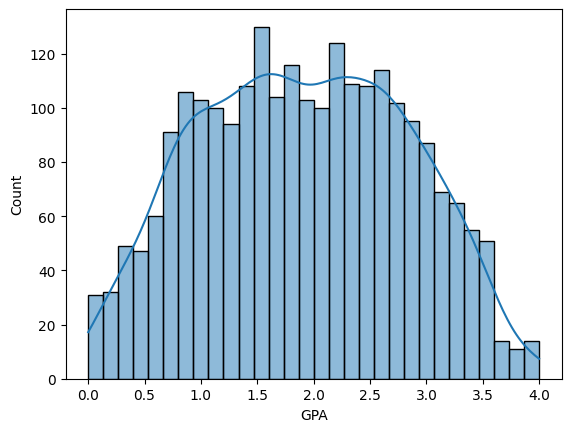

In [12]:
sns.histplot(df['GPA'],bins=30,kde = True)

### Let’s plot a scatter plot to see how study time affects GPA, with colors showing different grade classes `scatterplot()`.

<Axes: xlabel='StudyTimeWeekly', ylabel='GPA'>

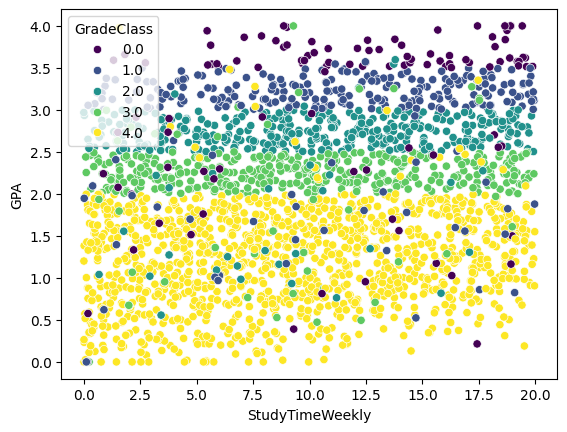

In [17]:
sns.scatterplot(x='StudyTimeWeekly', y='GPA', hue='GradeClass', data=df,palette="viridis")

### Visualize how students' absences relate to their GPA using a scatter plot, and see the difference across grade classes `.scatterplot()`

<Axes: xlabel='Absences', ylabel='GPA'>

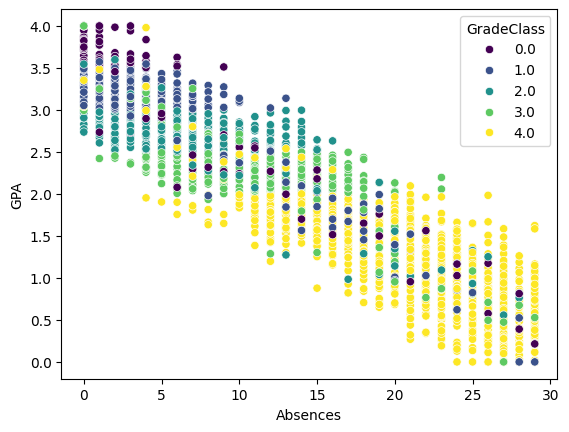

In [18]:
sns.scatterplot(x='Absences', y='GPA', hue='GradeClass', data=df,palette="viridis")

### Let's plot a heatmap to visualize how all numerical features in the dataset are correlated with each other

<Axes: >

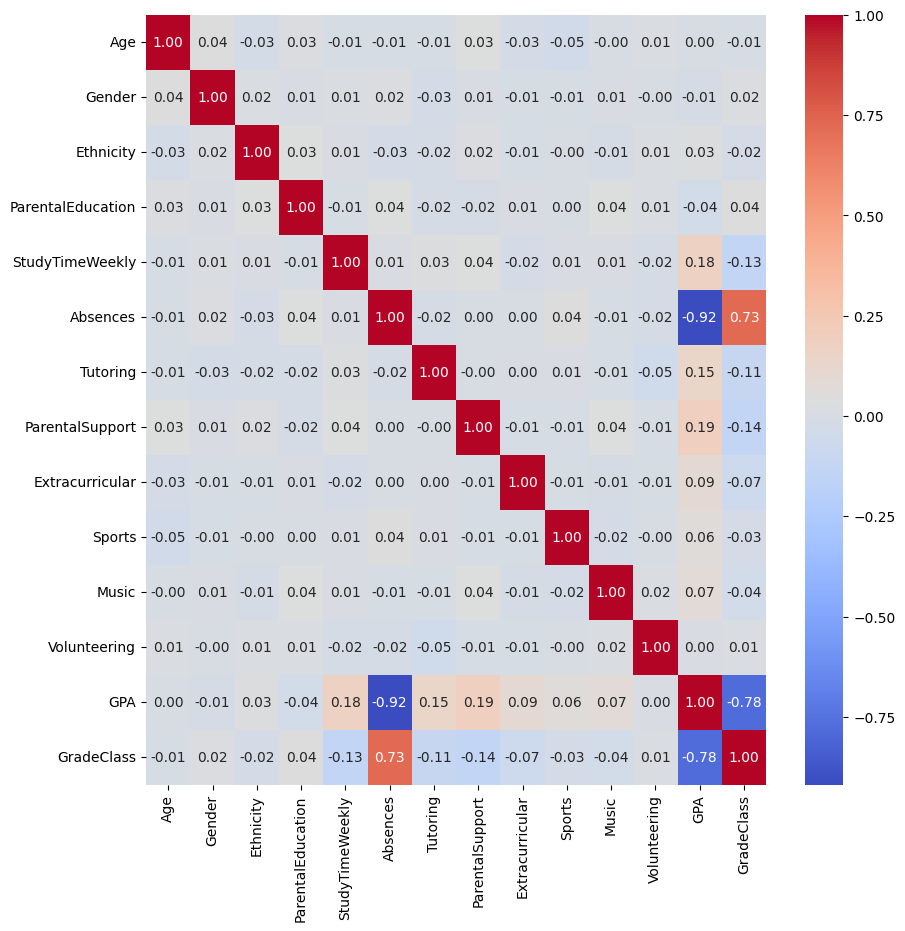

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt ='.2f')

### So till now we have completed our basic EDA and Visualization portion

Now, let's split our dataset into features and target variable:

**X → independent variables (features)**

**y → dependent variable (target)**

This step is called selecting features and target for our model.

In [29]:
X=df.drop(["GPA",'Gender',"Ethnicity",'ParentalEducation','Volunteering'],axis=1)
y=df["GPA"]

**After splitting the dataset into X (features) and y (target), the next step is to train our model on a portion of the data.**

**For this, we use train_test_split from sklearn.model_selection to divide the data into training and testing sets.**

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**K-Nearest Neighbors (KNN) is an algorithm that relies on distance between points.                                         
If the features are on different scales, the algorithm may give more importance to features with larger values, which can distort the results.**

**To avoid this, we use StandardScaler to scale the features so that all of them contribute equally and we will import it from sklearn.preprocessing.**

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Now, let's create a KNN regression model using sklearn.neighbors

In KNN, n_neighbors specifies how many nearest points (neighbors) the algorithm should look at when making a prediction for a new data point and n_neighbors is a hyperparameter in KNN regression.

For now we have selected our K-value as 4 means 4 nearest neighbors later on we will check for best n_nighbors value

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)

### Train X and y feature

In [33]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

### Make prediction on X_test

In [34]:
y_pred = knn.predict(X_test)

### Finally, we have created our KNN model, trained it on X_train and y_train, and made predictions. Now, let's evaluate how well the model is performing using the R² score.

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8765735929164302

### To find the optimal number of neighbors for our KNN model, we iterate n_neighbors from 1 to 15, training the model and making predictions for each case, then record the R² score.

This helps us see how model performance varies and choose the best neighbor value.


In [36]:
scores = []
for i in range(1,16):
  model = KNeighborsRegressor(n_neighbors=i)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  scores.append(r2_score(y_test, y_pred))

In [37]:
scores

[0.8258838819385446,
 0.8513857038647822,
 0.871915110327263,
 0.8765735929164302,
 0.8797880575587086,
 0.8828400671804206,
 0.8834800097383682,
 0.8828252407799126,
 0.882693994565458,
 0.8792867374142637,
 0.8775728004568853,
 0.8756104228177749,
 0.8737683732791881,
 0.8721958527963655,
 0.8697724769196283]

### Now, let's visualize how the R² score changes with different numbers of neighbors by plotting n_neighbors (1 to 15) on the x-axis and the corresponding scores on the y-axis.

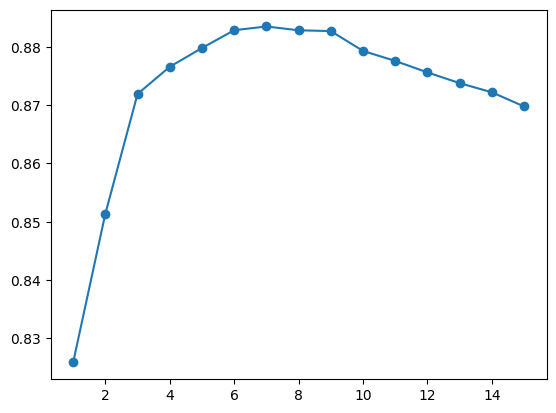

In [38]:
plt.plot(range(1,16),scores,marker='o')

# As we can see from the graph, we can identify the best k value for our KNN model.
# Choosing this optimal number of neighbors may slightly change the model's performance and improve its predictions.